# EasyVisa Case Study

### Problem Statement

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


### Data Dictionary

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

1. `case_id`: ID of each visa application
2. `continent`: Information of continent the employee
3. `education_of_employee`: Information of education of the employee
4. `has_job_experience`: Does the employee has any job experience? Y= Yes; N = No
5. `requires_job_training`: Does the employee require any job training? Y = Yes; N = No 
6. `no_of_employees`: Number of employees in the employer's company
7. `yr_of_estab`: Year in which the employer's company was established
8. `region_of_employment`: Information of foreign worker's intended region of employment in the US.
9. `prevailing_wage`:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
10. `unit_of_wage`: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
11. `full_time_position`: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
12. `case_status`:  Flag indicating if the Visa was certified or denied

## Outline

Data Cleaning and Analysis:
- <a href = #link1>  1. Data Overview </a>
- <a href = #link2>  2. Exploratory Data Analysis (EDA) </a>
- <a href = #link3>  3. Data Preprocessing </a>

Ensemble Learning Techniques:
- <a href = #link4>  4. Bagging Classifiers </a>
- <a href = #link5>  5. Boosting Classifiers </a>
- <a href = #link6>  6. Stacking Classifiers </a>

Performance Comparisons:
- <a href = #link7>  7. Summary of Model Performances </a>

# <a name='link1'>  1. Data Overview</a>

### Importing necessary libraries and data

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

#Removes the limit from the number of displayed columns and rows.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

#Using plotly for specific plots of categorical variables
import plotly.graph_objects as go
import plotly.express as px
from  plotly.subplots import make_subplots
import plotly.io as pio

#Add a nice bachground to graphs and show graghs in the notebood
sns.set(color_codes=True)
%matplotlib inline 

#Function to randomly split the data into train data and test data
from sklearn.model_selection import train_test_split  

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# To build ensemble classifiers (Bagging)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# To build ensemble classifiers (Boosting)
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier

from xgboost import XGBClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [226]:
#importing DataFrame with the name "EasyVisa.csv"
data=pd.read_csv('EasyVisa.csv')
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
print(f'There are {data.shape[1]} columns and {data.shape[0]} rows in the data set.')  # f-string

There are 12 columns and 25480 rows in the data set.


Let us take a look at the imported data and the summary of different columns:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Nine of the columns represent <font color='green'>categorical variables (qualitative)</font>, i.e.:

* case_id
* continent
* education_of_employee
* has_job_experience 
* requires_job_training
* region_of_employment
* unit_of_wage
* full_time_position
* case_status

And three other columns represent <font color='green'>quantitative variables</font>:

* no_of_employees
* yr_of_estab
* prevailing_wage 

From the 12 features in the data, **case_id** is not useful for us and hence we drop it.

In [7]:
#droping 'case_id' column
data.drop(['case_id'], axis=1, inplace=True)
print(f'No we have There are {data.shape[1]} columns in the data set.')  # f-string

No we have There are 11 columns in the data set.


The number of unique labels in each column is listed as below:

In [8]:
data.nunique()

continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

We can see that the number of uniques labels in the numerical columns **no_of_employees**, **yr_of_estab**, and **prevailing_wage** are very high and the number of uniques labels in the categorical variables ranges between 2 to 6, which is sensible.

Now we check the missing values in the data. Below, the number of missing values in any column of the imported data is shown:

In [9]:
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are **no missing values** in our dataframe.

# <a name='link2'>  2. Exploratory Data Analysis (EDA)</a>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help us approach the analysis in the right manner and generate insights from the data.

First, we define a few functions for EDA and next, we proceed with our analysis.

In [177]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [178]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature,  kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature,  kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [179]:
def histogram_boxplot_hue(data, feature, hue, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature,  hue=hue, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature,  hue=hue, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [227]:
# function to create labeled barplots

def labeled_barplot_hue(data, feature, hue, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 4))
    else:
        plt.figure(figsize=(n + 2, 4))
    

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette="husl",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [181]:
### function to plot distributions by another feature's labels


def distribution_by_label(data, predictor, feature):

    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    feature_uniq = data[feature].unique()

    axs[0,0].set_title("Distribution for label= " + str(feature_uniq[0]))
    sns.histplot(
        data=data[data[feature] == feature_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0,0],
        color="teal",
        stat="density",
    )

    axs[0,1].set_title("Distribution for label= " + str(feature_uniq[1]))
    sns.histplot(
        data=data[data[feature] == feature_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0,1],
        color="orange",
        stat="density",
    )

    axs[1,0].set_title("Distribution for label= " + str(feature_uniq[2]))
    sns.histplot(
        data=data[data[feature] == feature_uniq[2]],
        x=predictor,
        kde=True,
        ax=axs[1,0],
        color="blue",
        stat="density",
    )

    axs[1,1].set_title("Distribution for label= " + str(feature_uniq[3]))
    sns.histplot(
        data=data[data[feature] == feature_uniq[3]],
        x=predictor,
        kde=True,
        ax=axs[1,1],
        color="pink",
        stat="density",
    )
    plt.tight_layout()
    plt.show()

**Questions**:

**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


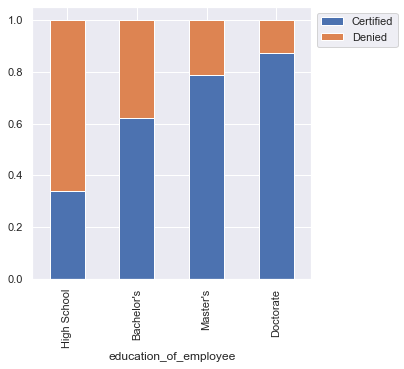

In [15]:
stacked_barplot(data, "education_of_employee", "case_status")

Yes, applicants who have a higher education do have a better chance of visa certification and are less likely to be denied.

**2. How does the visa status vary across different continents?**

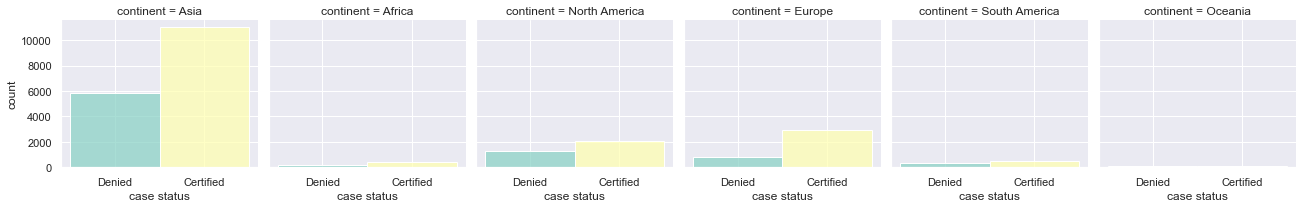

In [16]:
#definig the color
color=sns. set_palette("Set3");

#plotting

fig = sns.FacetGrid(data, col="continent", hue='case_status', palette=color);
fig.map(sns.histplot, "case_status" );

#adding labels
fig.set(xlabel='case status', ylabel='count');

* Most of the applicants came from Asia and there are very few applicants who come from Oceania.
* There does not seem to be any specific relation between the continents and the visa status.

**3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

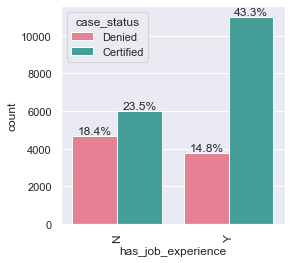

In [182]:
labeled_barplot_hue(data, "has_job_experience", "case_status", perc=True)

* The percentage of experienced professionals who apply for a visa (58.1%) is higher than the non-experienced workers (41.9%).
* 74.5% of the experienced workers are approved for a visa while only 56.1% of the visa applications of the non-experienced workers get approved. Hence, applicants with work experience have a higher chance of visa approval. 

**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

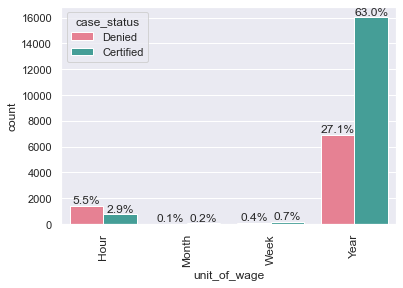

In [18]:
labeled_barplot_hue(data, "unit_of_wage", "case_status", perc=True)

Workers with **Yearly** pay units are most likely to be certified for a visa.

**5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

From the data, we can see that when **prevailing_wage is a small amount**, the associated unit_of_wage is **Hour**.

In [39]:
data[data['prevailing_wage']<=4][['prevailing_wage','unit_of_wage','case_status']]

,prevailing_wage,unit_of_wage,case_status
634,3.3188,Hour,Denied
5455,3.4889,Hour,Certified
17448,3.0031,Hour,Denied
20575,2.1367,Hour,Certified
22855,2.9561,Hour,Denied


However, for **larger amounts of prevailing_wage** the associated unit_of_wage is **Year**.

In [40]:
data[data['prevailing_wage']>=310000][['prevailing_wage','unit_of_wage','case_status']]

,prevailing_wage,unit_of_wage,case_status
12215,315497.60,Year,Certified
14810,318446.05,Year,Certified
16223,314156.06,Year,Certified
20957,311734.49,Year,Certified
21077,319210.27,Year,Denied


We plot the boxplot of prevailing_wage and histogram of the **prevailing_wage** vs **case_status** as below:

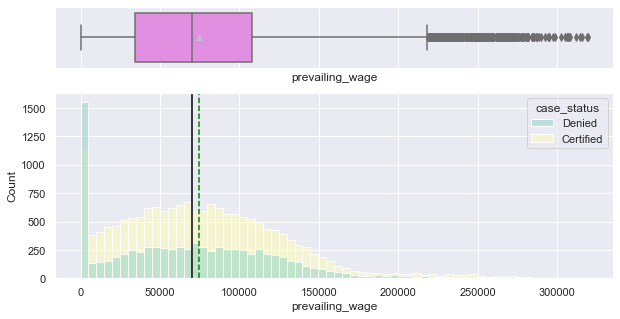

In [19]:
histogram_boxplot_hue(data, "prevailing_wage", hue="case_status")

* Based on the recorded data, there does not seem to be any specific pattern between the certified/denied cases and the prevailing wage.

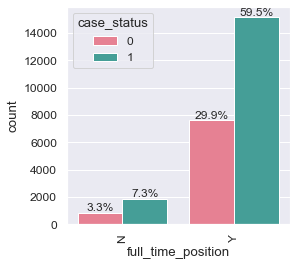

In [169]:
labeled_barplot_hue(data, "full_time_position", "case_status", perc=True)

* Visa Applicants that seek full-time job positions are the majority of applicants (89.4% of applicants).
* Almost 66% of applicants with full-time job positions get Vise certified. Hence, having a full-time position increases the chance of being visa certified.

#### Summary of Quantitative Variables

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observations:**

* We see that the minimum amount of no_of_employees is **-26**, which does not make sense.
* We also see that the maximum number of employees is extremely larger than the 75% of the values which indicates a **very long tail for the distribution** of this variable.
* Most of the cases correspond to a company with 2109 employees.
* The year in which companies have been established ranges from 1800 to 2016.
* Most of the companies have been established in 1997.
* prevailing_wage ranges from approximately 2 dollars to 319210 dollars which is odd.

#### Correlations

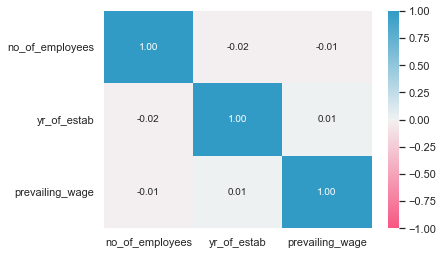

In [21]:
plt.figure(figsize=(6,4))

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap=cmap)
plt.show()

**Observations:**

* The correlations values for quantitative variables are shown above. We can not see a strog positive or strong negative correlations between any of the variables.

**Let us check the values of each categorical variable:**

In [22]:
# looking at value counts for non-numeric features

num_to_display = 12  # defining number of displayed levels for each non-numeric feature
for colname in data.dtypes[data.dtypes == 'object'].index:
    
    val_counts = data[colname].value_counts(dropna=False)  # Show NA counts
    print(f'\n\ncategrical variable= {colname} ') #f-String
    
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.\n') #f-String

    print(val_counts.iloc[:num_to_display])



categrical variable= continent 
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64


categrical variable= education_of_employee 
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64


categrical variable= has_job_experience 
Y    14802
N    10678
Name: has_job_experience, dtype: int64


categrical variable= requires_job_training 
N    22525
Y     2955
Name: requires_job_training, dtype: int64


categrical variable= region_of_employment 
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64


categrical variable= unit_of_wage 
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64


categrical variable= full_time_position 
Y    22773
N     2707
Name: full_time_position, dtype: int64




**Observations**:

* Most of the applicants are from Asia and very few from Oceania.
* Most of the applicants hold a Bachelor's or Masters's degree in education.
* Most foreign workers intended to work in the Northeast and South of the US and fewer preferred to go to Islands.
* Most work positions are full-time positions.

**Now, Let us check quantitative variables:**

In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

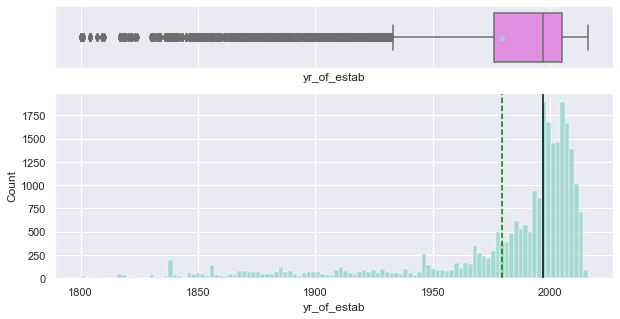

In [24]:
histogram_boxplot(data, "yr_of_estab",)

* Distribution of year of company establishment needs outlier treatment.
* The minimum amount is 1800. However, most of the entries fall above the year 1900.

Employers' companies established date ranges from the year 1800 to 2016 with an average of approximately 1980. The distribution of this 'yr_of_estab' feature is skewed and we can see that number of applicants has increased as time has passed.

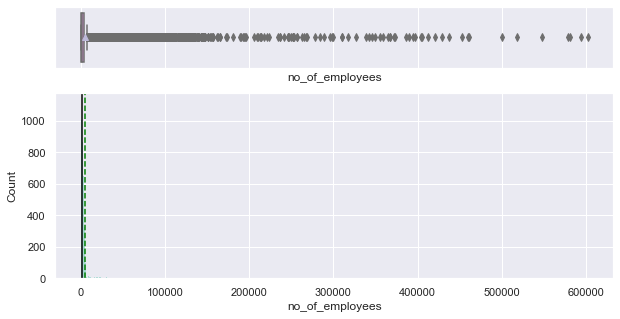

In [26]:
histogram_boxplot(data, "no_of_employees",)

There seem to be many outliers in this feature that needs to be treated. A histogram of the values of no_of_employees with negative values is plotted below. **Negative values** do not make sense for this feature and need to be treated.

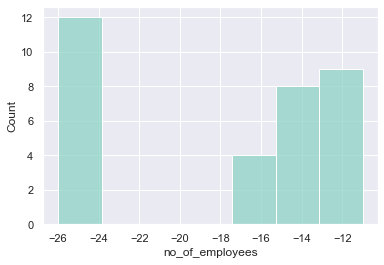

In [27]:
sns.histplot(data=data[data['no_of_employees']<0], x='no_of_employees');

In [28]:
for n in [ 500000, 200000, 50000, 5000]:
    print(' In {} rows the number of employees exceed {}'.format(data[data['no_of_employees']>n].shape[0], n))
print('-----------------------------------------------')
print(' In {} rows the number of employees is less than {}'.format(data[data['no_of_employees']<n].shape[0], n))


 In 6 rows the number of employees exceed 500000
 In 69 rows the number of employees exceed 200000
 In 574 rows the number of employees exceed 50000
 In 2637 rows the number of employees exceed 5000
-----------------------------------------------
 In 22840 rows the number of employees is less than 5000


The histogram of the no_of_employees less than 50,000 is plotted below. We can see that most of the values are less than 5000.

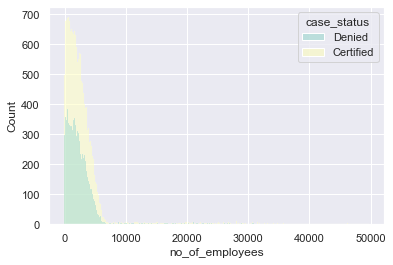

In [29]:
sns.histplot(data=data[data['no_of_employees']<50000], x='no_of_employees', hue='case_status');

* No apparent relationship between the number of employees and the case status.

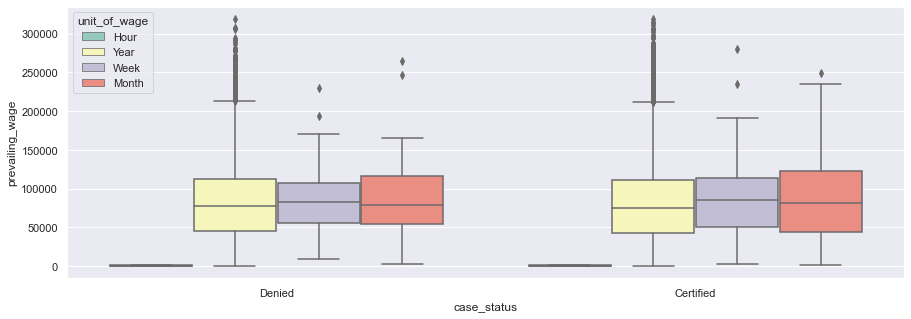

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(data['case_status'],data['prevailing_wage'],hue=data['unit_of_wage'])
plt.show()

* The prevailing  wage of workers that are paid hourly is very low.
* No apparent pattern between the case status and prevailing wage per unit of wage.

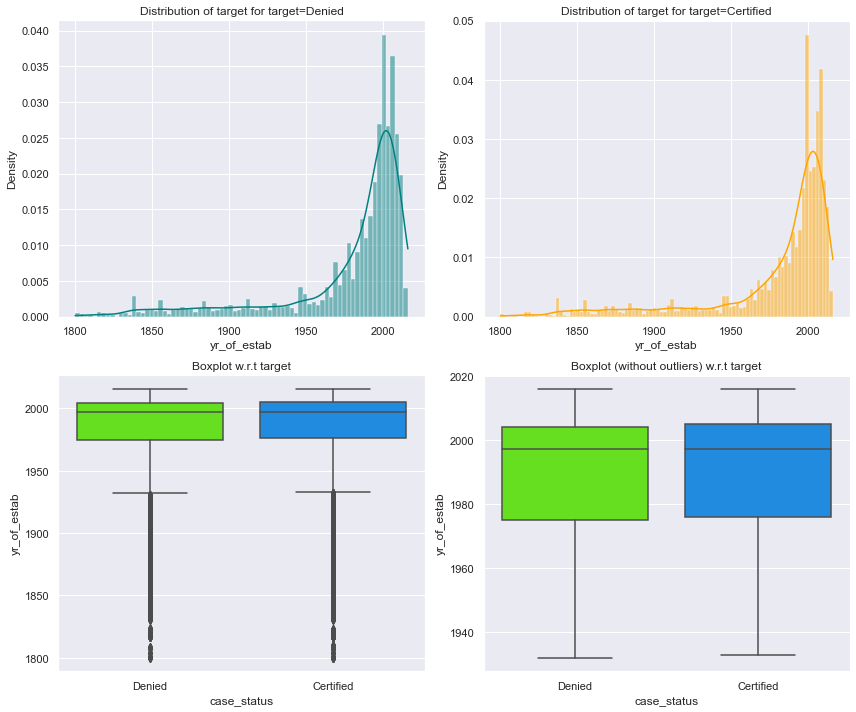

In [32]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

From the boxplots on the bottom right-hand side bottom left-hand side we learn that with or without outlier treatment, distribution of the companies' established year per denied and certified cases are very similar.         

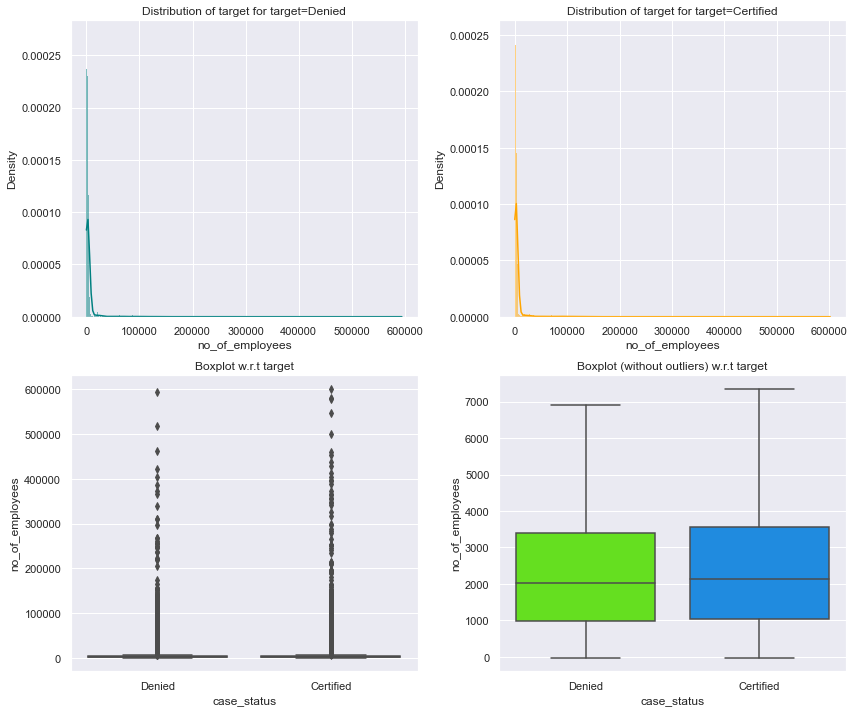

In [33]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

After outlier treatment, the distribution of the number of employees per certified case is wider as compared to the denied cases.

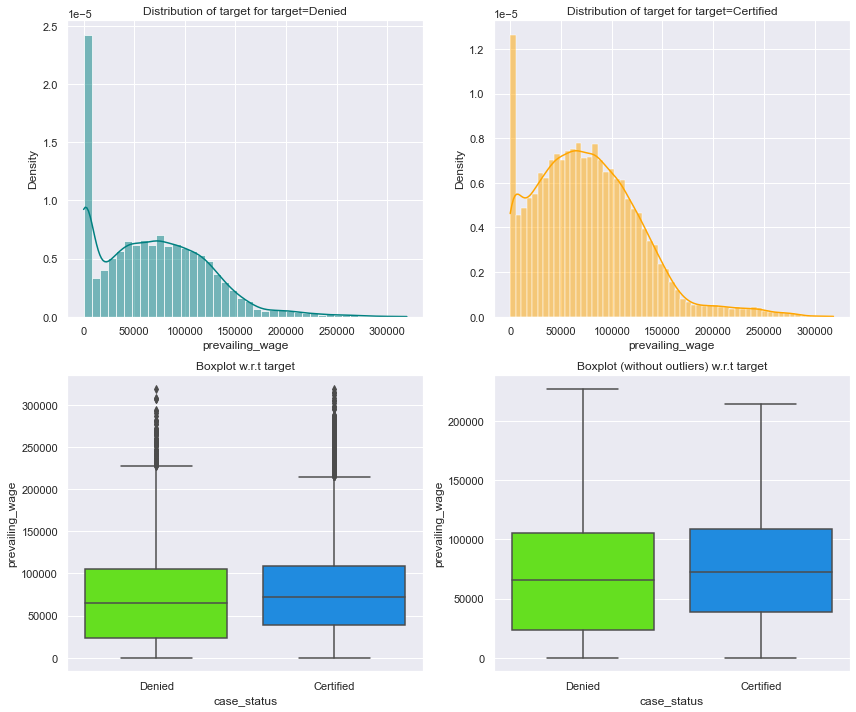

In [34]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

Before and after outlier treatment, the range of prevailing wages per denied case is wider as compared to the certified cases.

# <a name='link3'>  3. Data Preprocessing </a>
- Missing value treatment
- Duplicate value check
- Feature engineering
- Outlier detection and treatment
- Any other preprocessing steps
- EDA after Data Manipulation
- Preparing data for modeling 

### 3.1 Missing Value Treatment

In [37]:
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

There are no missing values in the dataframe.

### 3.2 Duplicate value check
Now, we want to figure out whether we have duplicate data and how to deal with them.

In [38]:
# Count the number of non-duplicates
(~data.duplicated()).sum()

# Count the number of duplicates in rows
data.duplicated().sum()

print('Among the {} rows of the dataframe {} rows are unique and {} rows are duplicates.'.format(data.shape[0] , (~data.duplicated()).sum(), data.duplicated().sum()))

Among the 25480 rows of the dataframe 25480 rows are unique and 0 rows are duplicates.


### 3.3 Outlier Detection and Treatment

We use **IQR**, which is the interval going from the 1st quartile to the 3rd quartile of the data in question, and then flag points for investigation if they are outside 1.5 * IQR. Let us look at the boxplot of our quantitative variables.

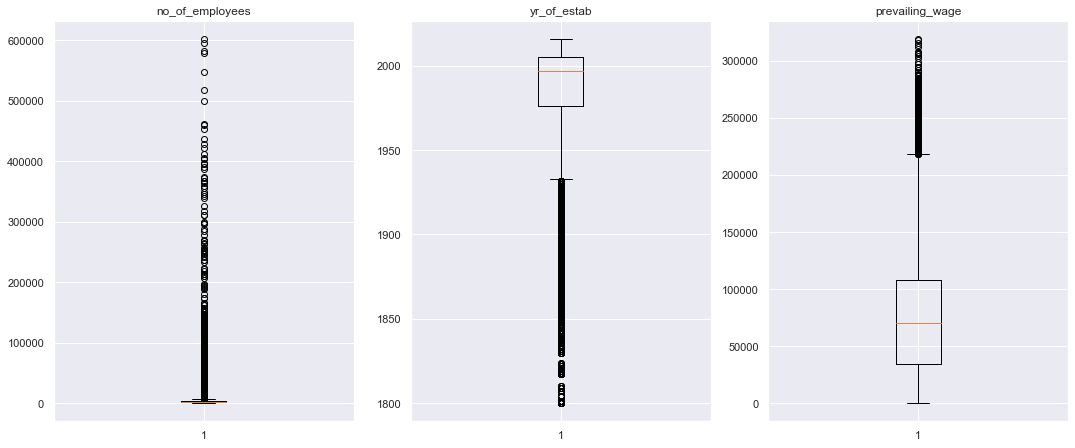

In [228]:
plt.figure(figsize=(20, 30))

# numerical columns
columns=data.dtypes[data.dtypes != 'object'].index 

# plot
for i, variable in enumerate(columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

All three quantitative variables have outliers. The following function is used to calculate the fraction of outliers for each numerical column based on IQR.

In [229]:
#Creating a function to calculate fraction of outliers
def frac_outside_IQR(y):
    x=y.to_numpy(dtype=object)
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    frac=round(np.mean(np.abs(x - np.median(x)) > length),2)
    return frac

#Create list of quantitative variables
numeric_columns=data.dtypes[data.dtypes != 'object'].index.tolist()

#Apply the frac_outside_IQR function on the numeric_columns in data set
data[numeric_columns].apply(frac_outside_IQR, axis=0)

no_of_employees    0.07
yr_of_estab        0.17
prevailing_wage    0.03
dtype: float64

We treat outliers in the data by flooring and capping as follows:

In [230]:
#Create function to treat outliers based on IQR
def treat_outliers_func(x):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = x.quantile(0.25)  # 25th quantile
    Q3 = x.quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    x = np.clip(x, Lower_Whisker, Upper_Whisker)

    return x

In [231]:
#Apply the frac_outside_IQR function on the numeric_columns in data set
data[numeric_columns]=data[numeric_columns].apply(treat_outliers_func, axis=0)

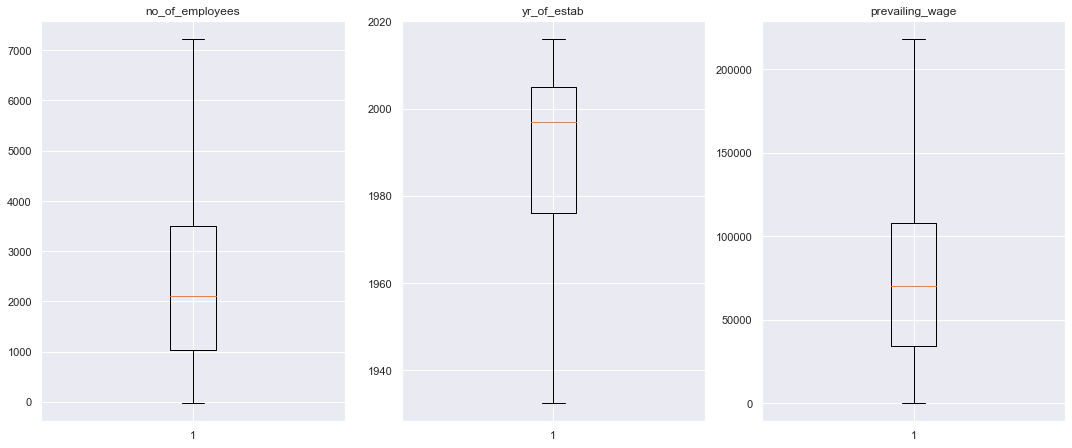

In [232]:
plt.figure(figsize=(20, 30))

# numerical columns
columns=data.dtypes[data.dtypes != 'object'].index 

# plot
for i, variable in enumerate(columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

The boxplot above shows that there are no more outliers in the quantitative features. However, when we check the data summary, we see that the minimum amount of no_of_employees is **-26**.

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,2494.988932,1874.490855,-26.0000,1022.00,2109.00,3504.0000,7227.00000
yr_of_estab,25480.0,1985.957143,25.813205,1932.5000,1976.00,1997.00,2005.0000,2016.00000
prevailing_wage,25480.0,73961.381602,51229.260352,2.1367,34015.48,70308.21,107735.5125,218315.56125


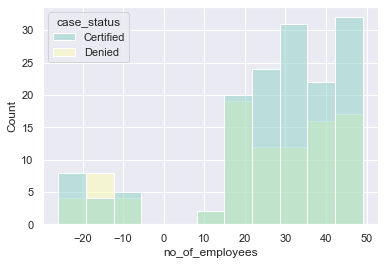

In [49]:
#Plotting values of no_of_employees that are less than 50
sns.histplot(data=data[data['no_of_employees']<50], x='no_of_employees', hue='case_status');

### Treating Negative Values

We treat the negative values of no_of_employees and convert them to the next positive value which is 10. 

In [233]:
#changing the negative values of no_of_employees to 10
data.loc[data[data['no_of_employees']<0].index,'no_of_employees']= 10

We check to see if the negative values have been treated:

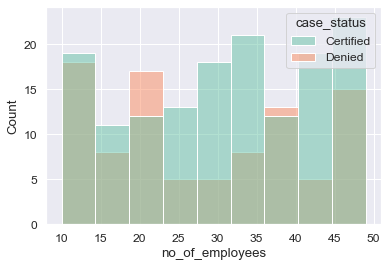

In [166]:
#Plotting values of no_of_employees that are less than 50
sns.histplot(data=data[data['no_of_employees']<50], x='no_of_employees', hue='case_status');

### 3.4 Other Data Manipulations

We change the values of **case_status** which is our target variable and represent it with numeric values. If **case_status=1** it indicates that Visa was certified and if **case_status=0** it shows Visa has been denied. 

In [234]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

### 3.5 EDA after Data Manipulation

- It is a good idea to explore the data once again after manipulating it.

In [53]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,7227,2007.0,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002.0,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,7227,2008.0,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1932.5,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005.0,South,149907.3900,Year,Y,1


In [54]:
print(f'There are {data.shape[1]} columns and {data.shape[0]} rows in the revised data set.')  # f-string

There are 11 columns and 25480 rows in the revised data set.


Average, median, standard deviation, min, max, and 1st and 3rd quantiles of quantitative variables are shown below:

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,2495.024882,1874.442915,10.0000,1022.00,2109.00,3504.0000,7227.00000
yr_of_estab,25480.0,1985.957143,25.813205,1932.5000,1976.00,1997.00,2005.0000,2016.00000
prevailing_wage,25480.0,73961.381602,51229.260352,2.1367,34015.48,70308.21,107735.5125,218315.56125
case_status,25480.0,0.667896,0.470977,0.0000,0.00,1.00,1.0000,1.00000


In [168]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,7227,2007.0,West,592.2029,Hour,Y,0
1,EZYV02,Asia,Master's,Y,N,2412,2002.0,Northeast,83425.6500,Year,Y,1
2,EZYV03,Asia,Bachelor's,N,Y,7227,2008.0,West,122996.8600,Year,Y,0
3,EZYV04,Asia,Bachelor's,N,N,98,1932.5,West,83434.0300,Year,Y,0
4,EZYV05,Africa,Master's,Y,N,1082,2005.0,South,149907.3900,Year,Y,1


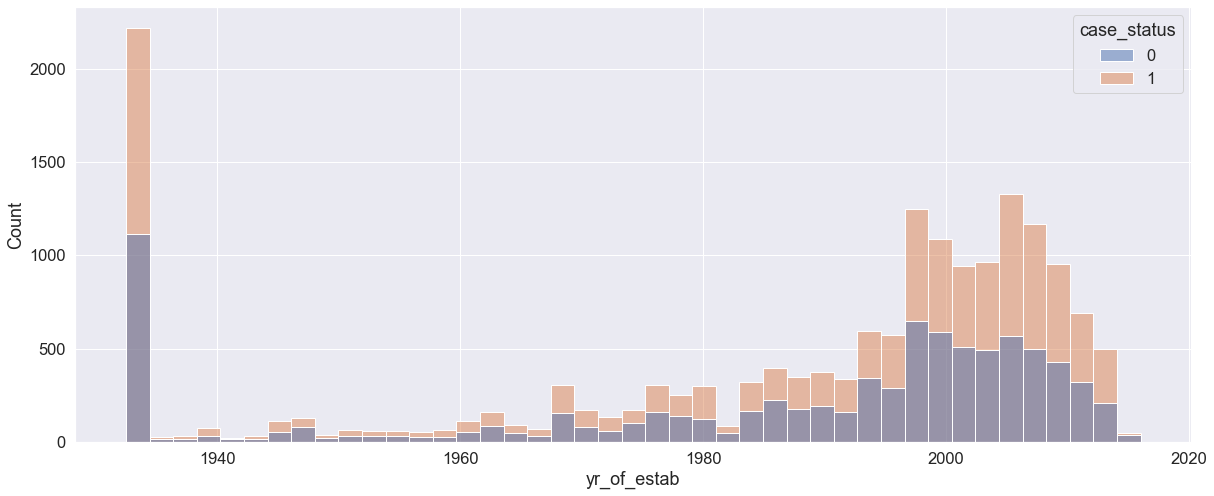

In [235]:
#plotting
fig = plt.figure(figsize=(20, 8));
sns.set(font_scale = 1.5)
ax=sns.histplot(data=data, x='yr_of_estab', hue='case_status');

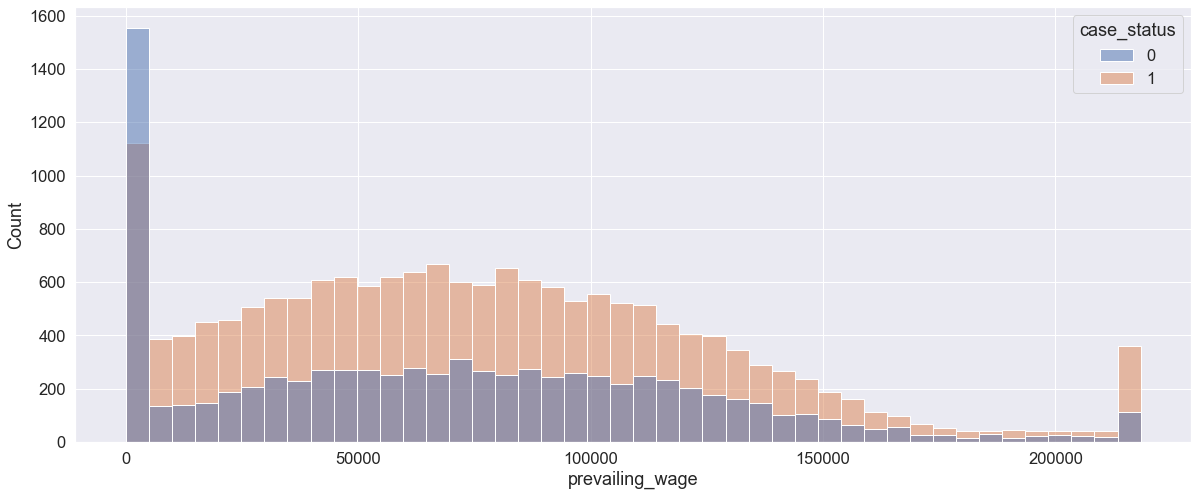

In [236]:
#plotting
fig = plt.figure(figsize=(20, 8));
ax=sns.histplot(data=data, x='prevailing_wage', hue='case_status');

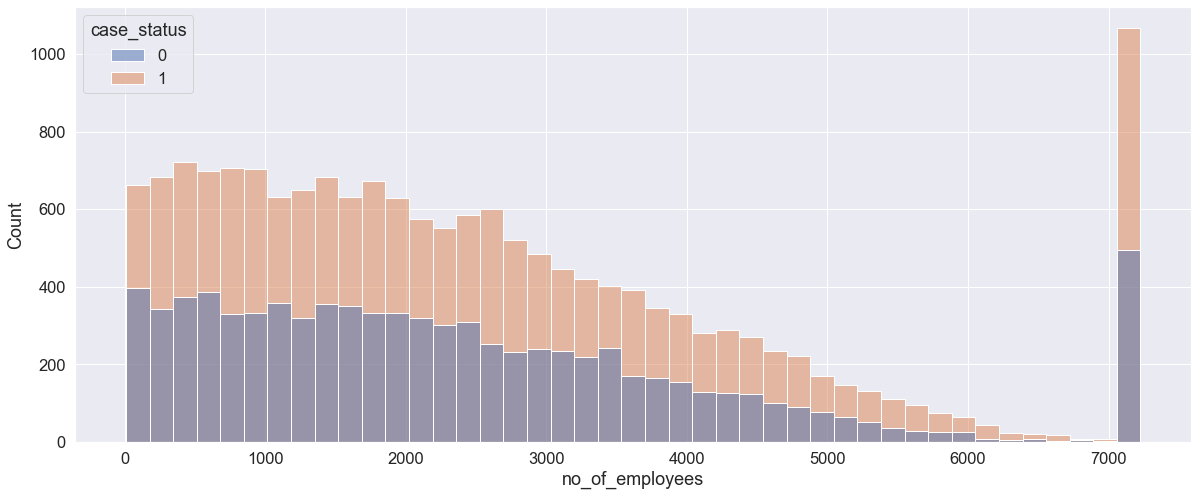

In [237]:
#plotting
fig = plt.figure(figsize=(20, 8));
ax=sns.histplot(data=data, x='no_of_employees', hue='case_status');

* We can not see any specific relation of quantitative variables with the case status.

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  float64
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 2.1+ MB


### 3.6 Splitting Data

#### One-hot Encoding Categorical Variables

Before we proceed to build models, we encode the categorical features.

In [60]:
#Create list of categorical features

object_columns=data.dtypes[data.dtypes == 'object'].index.tolist()

#Creating dummy variables and one-hot encoding for categorical variables
data=pd.get_dummies(data, columns = object_columns, drop_first=True)
data.head()

,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,7227,2007.0,592.2029,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002.0,83425.6500,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,7227,2008.0,122996.8600,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1932.5,83434.0300,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005.0,149907.3900,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


#### Defining predictors(x) and target (y) variables

In [61]:
x=data.drop(['case_status'], axis=1)
y=data[['case_status']]

#### Splitting data into train and test datasets
We will split the data into train and test to be able to evaluate the model that we build on the train data.

In [62]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,stratify=y)

In [63]:
print("Number of rows in train data =", x_train.shape[0]);
print("Number of rows in test data =", x_test.shape[0]);

Number of rows in train data = 17836
Number of rows in test data = 7644


In [64]:
target='case_status'

print("\nNumber (percentage) of Visas Status is as follow:")

print("\nWhole DataFrame:")
print("Certified:   {0} ({1:2.2f}%)".format(data[target].value_counts()[1], data[target].value_counts(normalize=True)[1] * 100 ))
print("Denied   :   {0} ({1:2.2f}%)".format(data[target].value_counts()[0], data[target].value_counts(normalize=True)[0] * 100 ))


print("\nTraining Set:")
print("Certified:   {0} ({1:2.2f}%)".format(y_train[target].value_counts()[1], y_train[target].value_counts(normalize=True)[1] * 100 ))
print("Denied   :   {0} ({1:2.2f}%)".format(y_train[target].value_counts()[0], y_train[target].value_counts(normalize=True)[0] * 100 ))

print("\nTest Set:")
print("Certified:   {0} ({1:2.2f}%)".format(y_test[target].value_counts()[1], y_test[target].value_counts(normalize=True)[1] * 100 ))
print("Denied   :   {0} ({1:2.2f}%)".format(y_test[target].value_counts()[0], y_test[target].value_counts(normalize=True)[0] * 100 ))


Number (percentage) of Visas Status is as follow:

Whole DataFrame:
Certified:   17018 (66.79%)
Denied   :   8462 (33.21%)

Training Set:
Certified:   11836 (66.36%)
Denied   :   6000 (33.64%)

Test Set:
Certified:   5182 (67.79%)
Denied   :   2462 (32.21%)


* The percentage of certified and denied Visas in the whole data set, the training set, and the test set are almost similar. Hence, split data sets have a good distribution for visa case status.
* The sets are **imbalanced** because the percentage of certified Visas is near 67% among all cases.

# <a name='link4'>  4. Bagging Classifiers</a>

In our analysis, when variable y=1 it indicates that the Visa has been Certified for the applicant and if y=0 the Visa has been denied. Using Ensemble Learning, We aim to build classification models to make predictions and be able to classify data entries. In this way, we can prepare a shortlist of candidates who have higher chances of visa approvals to reduce OFLC processes.

##### Our model can make wrong predictions as:
1. Predicting a Visa will be certified (y=1) but in reality, it gets denied (y=0)
2. Predicting a Visa will not be certified (y=0) but in reality, it does (y=1)

##### Which case is more important? 
* The Second case is more important to us as:

* If we predict a case will be denied but in reality, it does not then we do not consider the candidate in the shortlist of high chance candidates, and the worker losses his chance of Visa approval. This can both harm the employer and the foreign worker.

* However, if we predict that a case will be certified but in reality, it does not, then the harm would be less. Because we put the candidate on the shortlist, later OFLC processes the visa application that is in the shortlist and will deny the case since it does not have the required qualification. Hence, in this case, the only negative outcome is that OFLC process work increases.

##### How to reduce this loss?
* We need to minimize the False Negatives. Hence, `recall` should be maximized, the greater the recall higher the chances of correctly recognizing the applicants that in reality will be certified and lower the chances of not recognizing the real applicants who are qualified for the Visa.

**Let us define a function to provide metric scores (accuracy, recall, and precision) on train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [65]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [66]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    

    sns.set(font_scale = 1.1)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Greens_r")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## 4.1 Model Building

### Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'Gini' criteria to split. 
* The frequency of certified cases is 66% and the frequency of denied cases is 34%, hence certified cases are the dominant class and the decision tree will become biased toward the dominant classes.

* We pass a dictionary {0:0.66,1:0.34} to the model to specify the weight of each class and the decision tree will give more weightage to class 0 (denied cases).

* class_weight is a hyperparameter for the decision tree classifier.

In [67]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.66,1:0.34},random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.66, 1: 0.34}, random_state=1)

Confusion matrix of test set:


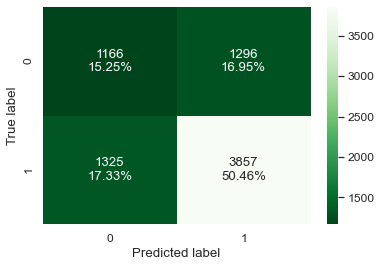

In [68]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(dtree, x_test, y_test)

##### Confusion Matrix:

* Worker's Visa is certified and the model predicted it correctly that the worker will get the Visa:  True Positive (observed=1,predicted=1)

* Worker's Visa is denied but the model predicted he will get the Visa: False Positive (observed=0,predicted=1)

* Worker's Visa is denied and the model predicted that it will be denied: True Negative (observed=0,predicted=0)

* Worker's Visa is certified but the model predicted that it would be denied: False Negative (observed=1,predicted=0)

In [69]:
print("Training performance metrices:")
dtree_perf_train=model_performance_classification_sklearn(dtree, x_train,y_train)
dtree_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [70]:
print("Test performance metrices:")
dtree_perf_test=model_performance_classification_sklearn(dtree, x_test,y_test)
dtree_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.657117,0.744307,0.748496,0.746396


The decision tree is working very well on the training data but is not able to generalize well on the test data concerning the recall.

### Building Bagging Classifier

In [71]:
bag = BaggingClassifier(random_state=1)
bag.fit(x_train,y_train)

BaggingClassifier(random_state=1)

Confusion matrix of test set:


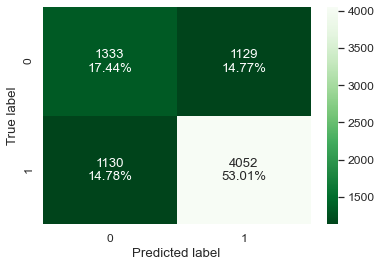

In [72]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(bag, x_test, y_test)

In [73]:
print("Training performance metrices:")
bag_perf_train=model_performance_classification_sklearn(bag, x_train,y_train)
bag_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.983292,0.984116,0.990645,0.98737


In [74]:
print("Test performance metrices:")
bag_perf_test=model_performance_classification_sklearn(bag, x_test,y_test)
bag_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.704474,0.781937,0.782088,0.782013


* The bagging classifier is performing better than the decision tree on the test set concerning the recall as well as accuracy, precision, and F1. However, it still is overfitting on the training set.

### Building Random Forest

We build a weighted random forest as follow:

In [75]:
rf = RandomForestClassifier(class_weight={0:0.66,1:0.34}, random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.66, 1: 0.34}, random_state=1)

Confusion matrix of test set:


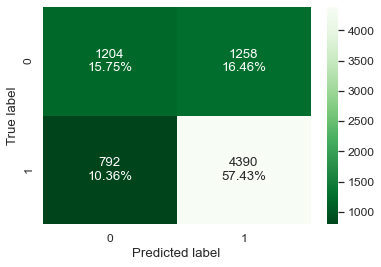

In [76]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(rf, x_test, y_test)

In [77]:
print("Training performance metrices:")
rf_perf_train=model_performance_classification_sklearn(rf, x_train,y_train)
rf_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.999944,1.0,0.999916,0.999958


In [78]:
print("Test performance metrices:")
rf_perf_test=model_performance_classification_sklearn(rf, x_test,y_test)
rf_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.731816,0.847163,0.777266,0.810711


* The random forest classifier is overfitting on the training set.
* The random forest classifier is performing better than the decision tree and bagging on the test set concerning the recall as well as accuracy, and F1.

**Performance Summary for Bagging models:**

In [79]:
# performance comparison on test set

models_comp1_df = pd.concat(
    [
        dtree_perf_test.T,
        bag_perf_test.T,
        rf_perf_test.T,
    ],
    axis=1,
)

models_comp1_df.columns = [
    "Decision_Tree_Test",
    "Bagging_Test",
    "RandomForest_Test",
]

print("\nperformance metrices of all models on test set:")
models_comp1_df.T


performance metrices of all models on test set:


,Accuracy,Recall,Precision,F1
Decision_Tree_Test,0.657117,0.744307,0.748496,0.746396
Bagging_Test,0.704474,0.781937,0.782088,0.782013
RandomForest_Test,0.731816,0.847163,0.777266,0.810711


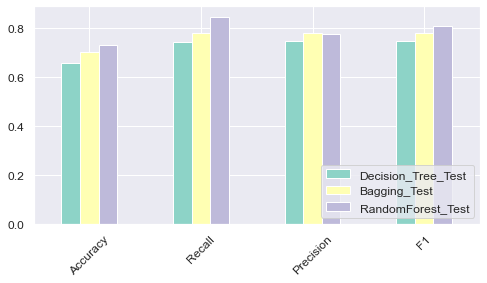

In [80]:
#setting color
color=sns. set_palette("Set3");

#plotting
models_comp1_df.plot(kind="bar", figsize=(8, 4));
plt.legend(['Decision_Tree_Test','Bagging_Test','RandomForest_Test'], loc='lower right');
plt.xticks(rotation=45);

The plot above displays the metric values of the built models on the test set. We observe that:
* The decision tree has the lowest performance compared to the two other models.  
* **Random forest** outperforms the other two models in terms of recall, accuracy, and F1.

## 4.2 Model Tuning using GridSearch

* Hyperparameter tuning is complicated and is up to experimentation meaning that there does not exist a systematic way to optimize and tune parameters in a way that the model loss is minimized.

* One of the tuning techniques that aim to compute the optimum values of hyperparameters in a predetermined value set of parameters is Grid search. 
* Grid search is an exhaustive search. The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### Tuning Decision Tree

In [81]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.66,1:0.34},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.66, 1: 0.34}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

Confusion matrix of test set:


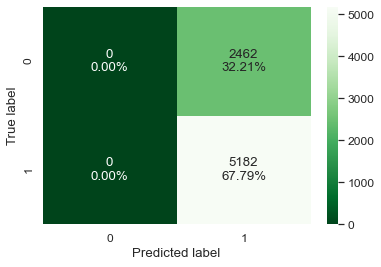

In [82]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(dtree_tuned, x_test, y_test)

In [83]:
print("Training performance metrices:")
dtree_tuned_perf_train=model_performance_classification_sklearn(dtree_tuned, x_train,y_train)
dtree_tuned_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.663602,1.0,0.663602,0.797789


In [84]:
print("Test performance metrices:")
dtree_tuned_perf_test=model_performance_classification_sklearn(dtree_tuned, x_test,y_test)
dtree_tuned_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.677917,1.0,0.677917,0.808046


* The model is **not overfitting** because matrices are almost similar on the train and the test sets. This indicates that the model is well able to describe data properties without the inherent noise of the training data set.
* The tuned decision tree is performing perfectly on both training and test data in terms of recall. However, the precision is very low on both training and test sets.

### Tuning Bagging Classifier

In [85]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.66,1:0.34},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,50,100],
              'max_features': [0.7,0.8,0.9,1]
             }

# Run the grid search
grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(x_train, y_train)

# getting the best estimator
bag_tuned  = grid.best_estimator_
bag_tuned.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.66,
                                                                      1: 0.34},
                                                        random_state=1),
                  max_features=0.7, n_estimators=100, random_state=1)

Confusion matrix of test set:


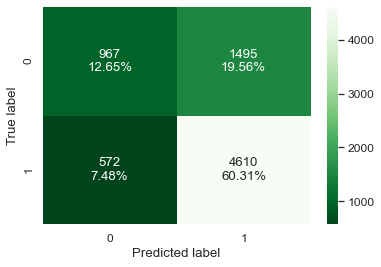

In [86]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(bag_tuned, x_test, y_test)

In [87]:
print("Training performance metrices:")
bag_tuned_perf_train=model_performance_classification_sklearn(bag_tuned, x_train,y_train)
bag_tuned_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.999944,1.0,0.999916,0.999958


In [88]:
print("Test performance metrices:")
bag_tuned_perf_test=model_performance_classification_sklearn(bag_tuned, x_test,y_test)
bag_tuned_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.729592,0.889618,0.755119,0.816869


* The model is overfitting because its performance dropped on the test set.
* The tuned bagging model is performing well on test data in terms of recall and F1.

### Tuning Random Forest

In [89]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.66,1:0.34}, random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [100,200],
        "min_samples_leaf": [2,5],
        "max_features": [0.5,'log2','auto'],
        "max_samples": [0.5,0.9],
}

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.66, 1: 0.34}, max_features=0.5,
                       max_samples=0.5, min_samples_leaf=2, n_estimators=200,
                       random_state=1)

Confusion matrix of test set:


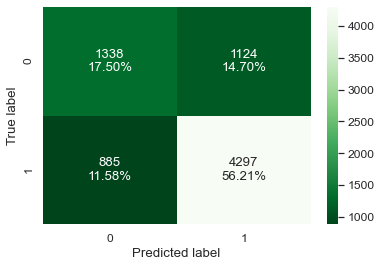

In [90]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(rf_tuned, x_test, y_test)

In [91]:
print("Training performance metrices:")
rf_tuned_perf_train=model_performance_classification_sklearn(rf_tuned, x_train,y_train)
rf_tuned_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.887755,0.925989,0.906834,0.916311


In [92]:
print("Test performance metrices:")
rf_tuned_perf_test=model_performance_classification_sklearn(rf_tuned, x_test,y_test)
rf_tuned_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.737179,0.829217,0.792658,0.810525


* The model is overfitting because metrices are better on the training set as compared to the test set.
* The tuned random forest model is performing very well on both training and test data.

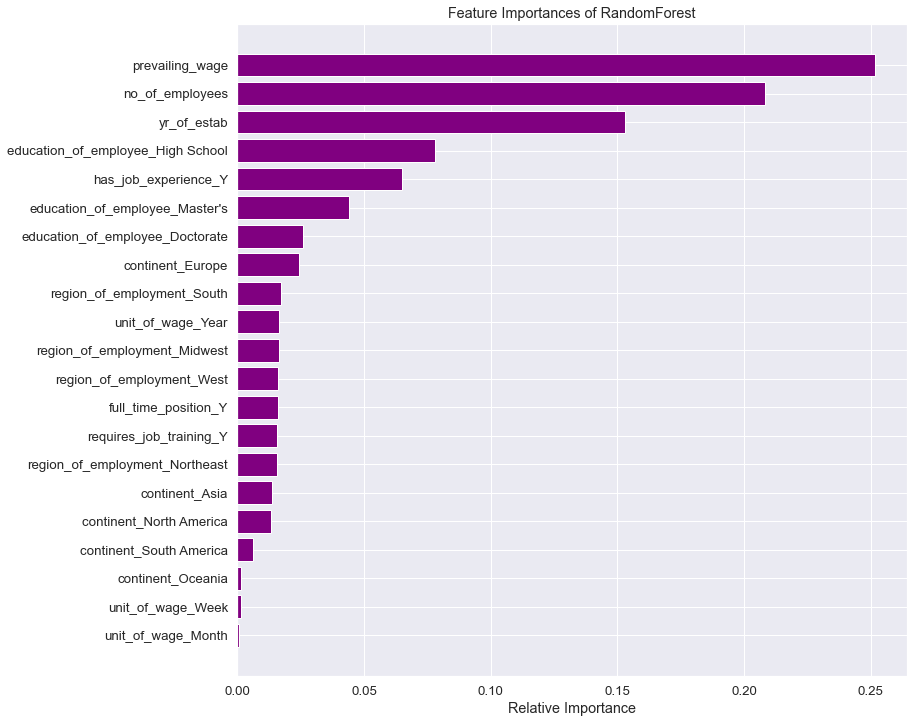

In [209]:
# creating a list of column names
feature_names = x_train.columns.to_list()

# Displaying important features in tree
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances of RandomForest")
plt.barh(range(len(indices)), importances[indices], color="purple", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


Prevailing wage, number of employees, year of establish, high school education level, having job experience, Master’s and Doctorate education levels, Europe continent, south region of employment, and yearly unit of wages are the most influential factors.


**Performance Summary for Tuned Bagging models:**

In [93]:
# performance comparison on test set

models_comp2_df = pd.concat(
    [
        dtree_tuned_perf_test.T,
        bag_tuned_perf_test.T,
        rf_tuned_perf_test.T,
    ],
    axis=1,
)

models_comp2_df.columns = [
    "Decision_Tree_Tuned_Test",
    "Bagging_Tuned_Test",
    "RandomForest_Tuned_Test",
]

print("\nperformance metrices of all the tuned models on test set:")
models_comp2_df.T


performance metrices of all the tuned models on test set:


,Accuracy,Recall,Precision,F1
Decision_Tree_Tuned_Test,0.677917,1.000000,0.677917,0.808046
Bagging_Tuned_Test,0.729592,0.889618,0.755119,0.816869
RandomForest_Tuned_Test,0.737179,0.829217,0.792658,0.810525


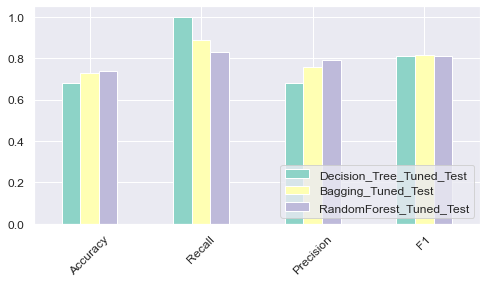

In [94]:
#setting color
color=sns. set_palette("Set3");

#plotting
models_comp2_df.plot(kind="bar", figsize=(8, 4));
plt.legend(['Decision_Tree_Tuned_Test','Bagging_Tuned_Test','RandomForest_Tuned_Test'], loc='lower right');
plt.xticks(rotation=45);

The plot above displays the metric values of the tuned models on the test set. We observe that:
* The tuned decision tree has the best performance in terms of recall. However, it has the lowest precision value.
* Tuning the bagging model has improved the accuracy, recall, and F1 scores but has reduced the precision.
* Tuning the random forest has not made any improvements to this model.
* Overall, the tuned bagging model is more suitable compared to all models.

# <a name='link5'>  5. Boosting Classifiers</a>

Boosting is a class of ensemble machine learning algorithms that involve combining the predictions from many weak learners. Unlike the bagging method in which the weak learners are built in parallel, boosting method sequentially builds the models based on the prediction errors of the previous models.

## 5.1 Model Building
### AdaBoost Classifier
The AdaBoost algorithm involves using very short (one-level) decision trees as weak learners that are added sequentially to the ensemble. Each subsequent model attempts to correct the predictions made by the model before it in the sequence. This is achieved by weighing the training dataset to put more focus on training examples on which prior models made prediction errors. The AdaBoost Classifier for our case study is built as follow: 

In [95]:
ada=AdaBoostClassifier(random_state=1)
ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

Confusion matrix of test set:


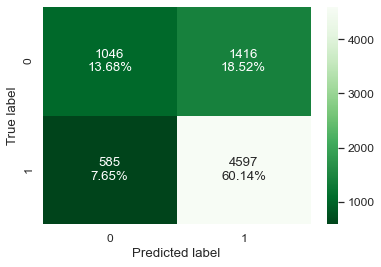

In [96]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(ada, x_test, y_test)

In [97]:
print("Training performance metrices:")
ada_perf_train=model_performance_classification_sklearn(ada, x_train,y_train)
ada_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.736712,0.88704,0.757613,0.817234


In [98]:
print("Test performance metrices:")
ada_perf_test=model_performance_classification_sklearn(ada, x_test,y_test)
ada_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.738226,0.887109,0.76451,0.821259


* Ada boost is not overfitting.
* Ada boost is performing well on both the training and the test sets.

### Gradient Boosting Classifier

In [99]:
gb=GradientBoostingClassifier(random_state=1)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

Confusion matrix of test set:


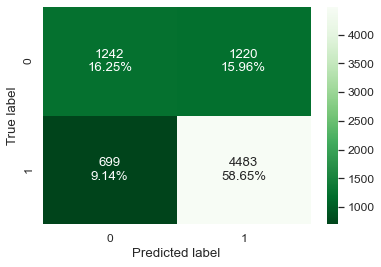

In [100]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(gb, x_test, y_test)

In [101]:
print("Training performance metrices:")
gb_perf_train=model_performance_classification_sklearn(gb, x_train,y_train)
gb_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.755719,0.873352,0.783403,0.825936


In [102]:
print("Test performance metrices:")
gb_perf_test=model_performance_classification_sklearn(gb, x_test,y_test)
gb_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.748953,0.86511,0.786078,0.823702


* The gradient boosting model is not overfitting.
* Model is performing well on both the training and the test sets.

### XGBoost Classifier

In [103]:
xgb=XGBClassifier(random_state=1)
xgb.fit(x_train,y_train)

[16:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Confusion matrix of test set:


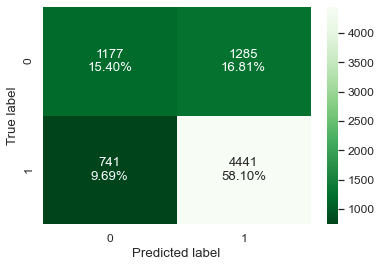

In [104]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(xgb, x_test, y_test)

In [105]:
print("Training performance metrices:")
xgb_perf_train=model_performance_classification_sklearn(xgb, x_train,y_train)
xgb_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.837239,0.932325,0.839994,0.883754


In [106]:
print("Test performance metrices:")
xgb_perf_test=model_performance_classification_sklearn(xgb, x_test,y_test)
xgb_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.734956,0.857005,0.775585,0.814265


* XGB classifier is performing better on the training data and hence is overfitting.

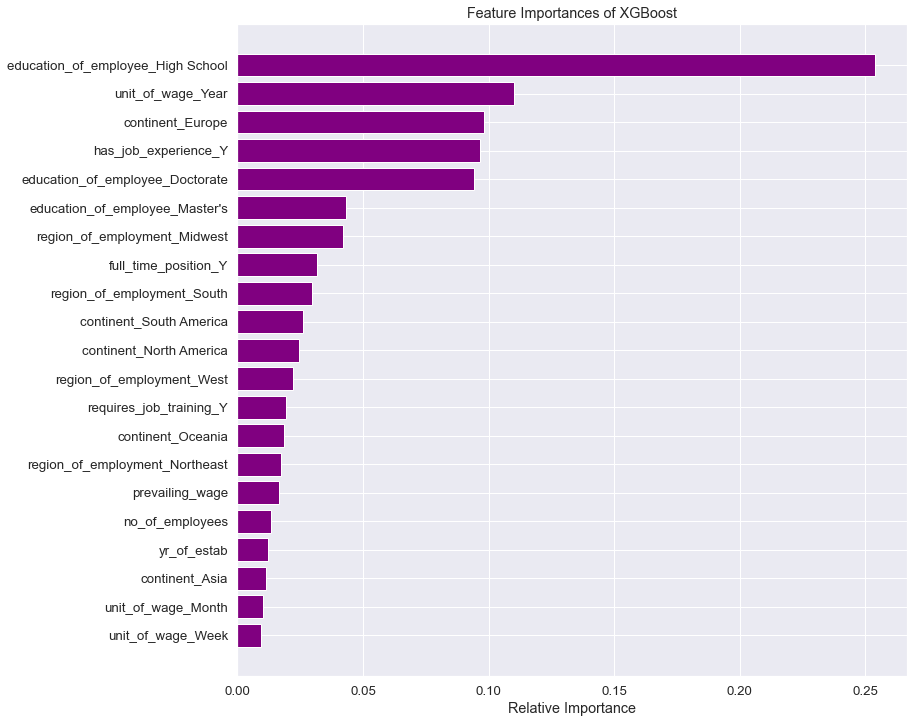

In [208]:
# creating a list of column names
feature_names = x_train.columns.to_list()

# Displaying important features in tree
importances = xgb.feature_importances_
indices = np.argsort(importances)

sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances of XGBoost")
plt.barh(range(len(indices)), importances[indices], color="purple", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## 5.2 Model Tuning using GridSearch


### Tuning AdaBoost Classifier

In [107]:
# Choose the type of classifier. 
ada_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1)],
    "n_estimators": [30,100,200],
    "learning_rate":[1, 0.1, 0.5, 0.01],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ada_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
ada_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=200, random_state=1)

Confusion matrix of test set:


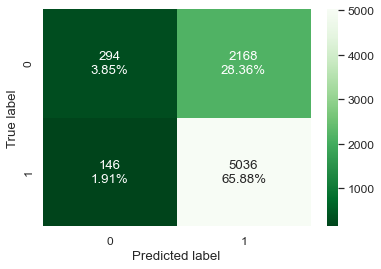

In [108]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(ada_tuned, x_test, y_test)

In [109]:
print("Training performance metrices:")
ada_tuned_perf_train=model_performance_classification_sklearn(ada_tuned, x_train,y_train)
ada_tuned_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.689056,0.971528,0.688233,0.805703


In [110]:
print("Test performance metrices:")
ada_tuned_perf_test=model_performance_classification_sklearn(ada_tuned, x_test,y_test)
ada_tuned_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.697279,0.971826,0.699056,0.813176


* The model is **not overfitting** because it performances matrices on the training and the test set are similar.
* The tuned bagging model is performing excellently on test data in terms of recall but very poorly concerning the precision value.

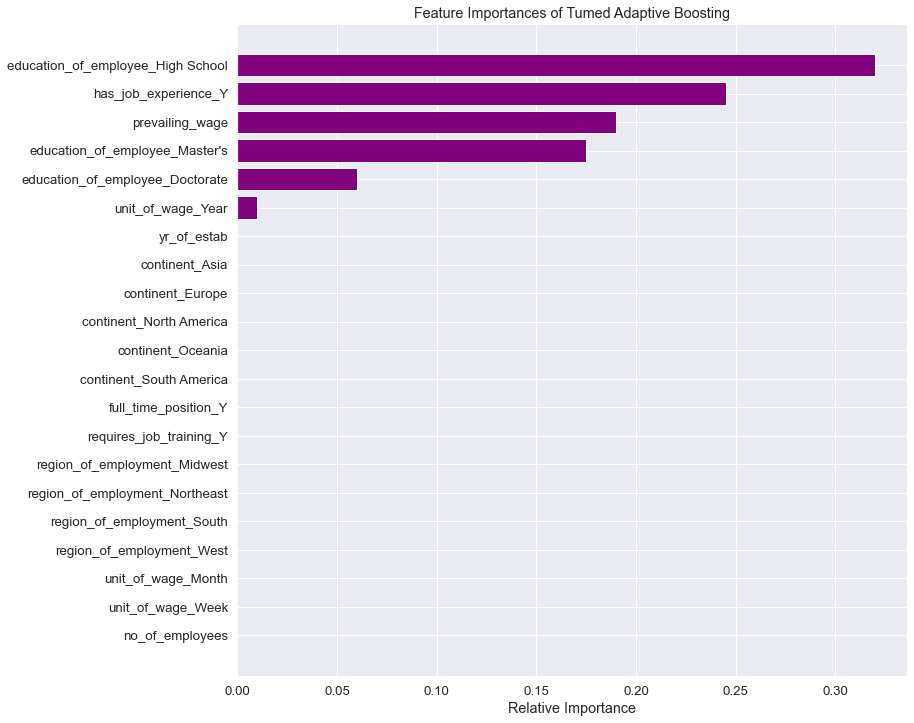

In [217]:
# creating a list of column names
feature_names = x_train.columns.to_list()

# Displaying important features in tree
importances = ada_tuned.feature_importances_
indices = np.argsort(importances)

sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances of Tumed Adaptive Boosting")
plt.barh(range(len(indices)), importances[indices], color="purple", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

High school education level, having job experience, prevailing wage, Master’s and Doctorate education levels, and yearly unit of wages are the most influential factors.

### Tuning Gradient Boosting Classifier

In [111]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,200,250],
    "subsample":[0.5,0.8,1],
    "max_features":[0.7,0.8,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

Confusion matrix of test set:


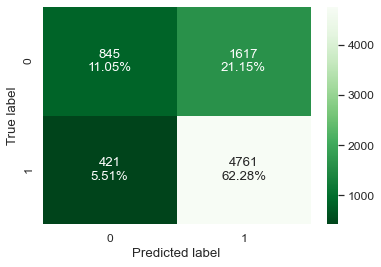

In [112]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(gb_tuned, x_test, y_test)

In [113]:
print("Training performance metrices:")
gb_tuned_perf_train=model_performance_classification_sklearn(gb_tuned, x_train,y_train)
gb_tuned_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.733348,0.924468,0.739125,0.821471


In [114]:
print("Test performance metrices:")
gb_tuned_perf_test=model_performance_classification_sklearn(gb_tuned, x_test,y_test)
gb_tuned_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.733386,0.918757,0.746472,0.823702


* The tuned gradient boosting model is **not overfitting** because its performance is almost similar to the training and the test sets.
* The recall value on the test set is very good, but the precision is less than other built models. 

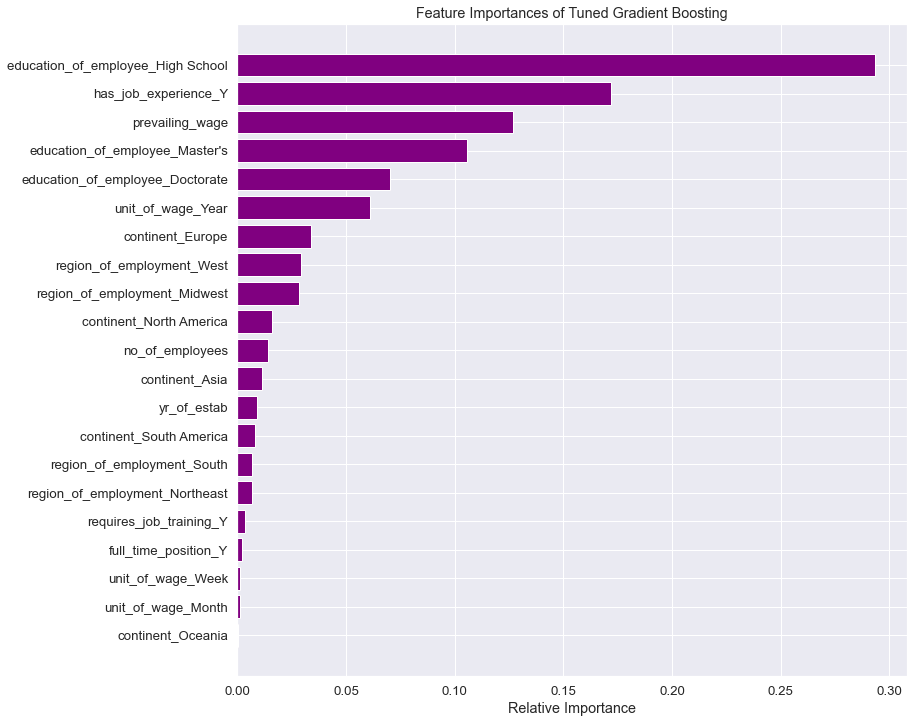

In [212]:
# creating a list of column names
feature_names = x_train.columns.to_list()

# Displaying important features in tree
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances of Tuned Gradient Boosting")
plt.barh(range(len(indices)), importances[indices], color="purple", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

High school education level, having job experience, prevailing wage, Master’s and Doctorate education levels, and yearly unit of wages are the most influential factors.

**Performance Summary for all Boosting models:**

In [115]:
# performance comparison on test set

models_comp3_df = pd.concat(
    [
        ada_perf_test.T,
        gb_perf_test.T,
        xgb_perf_test.T,
        ada_tuned_perf_test.T,
        gb_tuned_perf_test.T,
    ],
    axis=1,
)

models_comp3_df.columns = [
    "AdaBoost_Test",
    "GradientBoost_Test",
    "XGBoost_Test",
    "AdaBoost_Tuned_Test",
    "GradientBoost_Tuned_Test",
]

print("\nperformance metrices of all the boosting models on test set:")
models_comp3_df.T


performance metrices of all the boosting models on test set:


,Accuracy,Recall,Precision,F1
AdaBoost_Test,0.738226,0.887109,0.764510,0.821259
GradientBoost_Test,0.748953,0.865110,0.786078,0.823702
XGBoost_Test,0.734956,0.857005,0.775585,0.814265
AdaBoost_Tuned_Test,0.697279,0.971826,0.699056,0.813176
GradientBoost_Tuned_Test,0.733386,0.918757,0.746472,0.823702


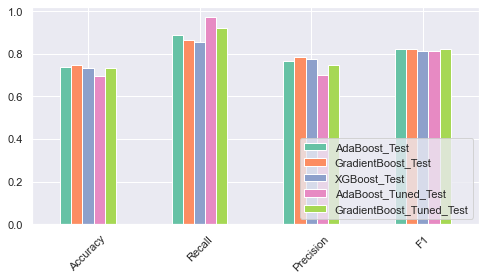

In [137]:
#setting color
color=sns. set_palette("Set2");

#plotting
models_comp3_df.plot(kind="bar", figsize=(8, 4));
plt.legend(['AdaBoost_Test','GradientBoost_Test','XGBoost_Test','AdaBoost_Tuned_Test','GradientBoost_Tuned_Test'], loc='lower right');
plt.xticks(rotation=45);

The plot above displays the metric values of the tuned boosting models on the test set. We observe that:
* The tuned ada boosting model has the best performance in terms of recall which is the most important performance metric for us. However, it has the lowest precision value.  
* All three models almost have almost a similar F1 value.

# <a name='link6'>  6. Stacking Classifiers </a>

In [153]:
#defining Bagging Classifier and AdaBoost as base estimators
estimators=[('Bagging Classifier', bag),('AdaBoost', ada)]

#defining the xgboost as the meta-estimator
final_estimator=XGBClassifier(random_state=1)

#building the stacking model
stacking=StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking.fit(x_train,y_train)

[18:49:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('Bagging Classifier',
                                BaggingClassifier(random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None, gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                     

Confusion matrix of test set:


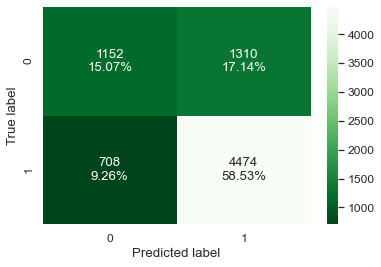

In [154]:
print("Confusion matrix of test set:")
confusion_matrix_sklearn(stacking, x_test, y_test)

In [155]:
print("Training performance metrices:")
stacking_perf_train=model_performance_classification_sklearn(stacking, x_train,y_train)
stacking_perf_train

Training performance metrices:


,Accuracy,Recall,Precision,F1
0,0.795414,0.907232,0.808037,0.854766


In [156]:
print("Test performance metrices:")
stacking_perf_test=model_performance_classification_sklearn(stacking, x_test,y_test)
stacking_perf_test

Test performance metrices:


,Accuracy,Recall,Precision,F1
0,0.736002,0.863373,0.773513,0.815977


* The stacking model performances well on the training and the test sets.

# <a name='link7'>  7. Summary of Model Performances</a>

In [157]:
# performance comparison on test set
stacking_perf_test = stacking_perf_test.rename(index={0: 'Stacking_Test'})


models_comp4_df = pd.concat(
    [
        models_comp1_df.T,
        models_comp2_df.T,
        models_comp3_df.T,
        stacking_perf_test,
    ],
    axis=0,
)

print("\nperformance metrices of all the classification models on test set:")
models_comp4_df


performance metrices of all the classification models on test set:


,Accuracy,Recall,Precision,F1
Decision_Tree_Test,0.657117,0.744307,0.748496,0.746396
Bagging_Test,0.704474,0.781937,0.782088,0.782013
RandomForest_Test,0.731816,0.847163,0.777266,0.810711
Decision_Tree_Tuned_Test,0.677917,1.000000,0.677917,0.808046
Bagging_Tuned_Test,0.729592,0.889618,0.755119,0.816869
RandomForest_Tuned_Test,0.737179,0.829217,0.792658,0.810525
AdaBoost_Test,0.738226,0.887109,0.764510,0.821259
GradientBoost_Test,0.748953,0.865110,0.786078,0.823702
XGBoost_Test,0.734956,0.857005,0.775585,0.814265
AdaBoost_Tuned_Test,0.697279,0.971826,0.699056,0.813176


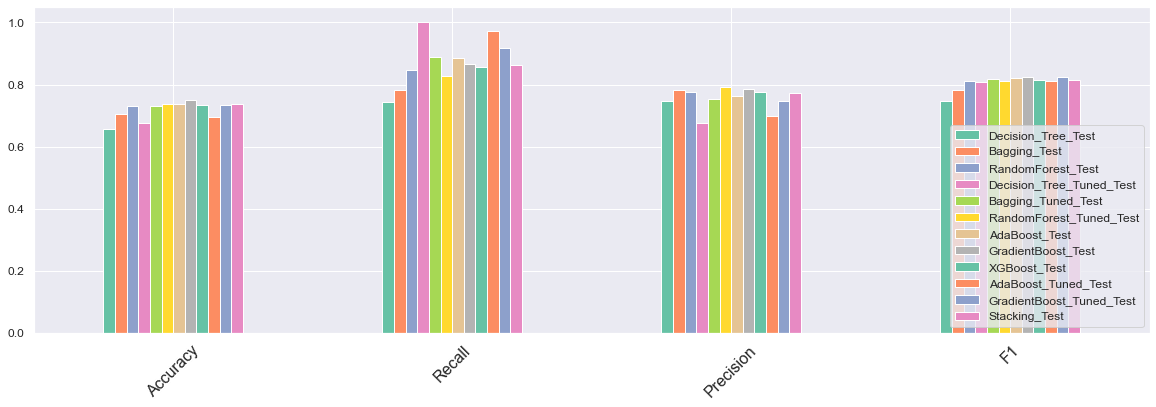

In [158]:
#setting color
color=sns. set_palette("Set2");

#plotting
models_comp4_df.T.plot(kind="bar", figsize=(20, 6));
plt.legend(models_comp4_df.index, loc='lower right');
plt.xticks(rotation=45, fontsize=16);

The plot above displays the metric values of the models on the test set. We observe that:
* The Decision_Tree_Tuned model has the best performance in terms of recall (100% value) but its precision value is 67% which is not good.
* The next model with the highest recall value is AdaBoost_Tuned but again its precision value is low (70%).
* **GradientBoost_Tuned** performs well among all other models with a recall value of 92%, the precision value of 75%, and F1 equal to 82%.

### Feature Importance of the Selected Classifier (Tuned Gradient Boosting)

In [215]:
# importance of features in the classifier building
print (pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.293472
has_job_experience_Y               0.171872
prevailing_wage                    0.126840
education_of_employee_Master's     0.105656
education_of_employee_Doctorate    0.069973
unit_of_wage_Year                  0.060814
continent_Europe                   0.033674
region_of_employment_West          0.029392
region_of_employment_Midwest       0.028292
continent_North America            0.015855
no_of_employees                    0.014259
continent_Asia                     0.011512
yr_of_estab                        0.009152
continent_South America            0.007872
region_of_employment_South         0.006698
region_of_employment_Northeast     0.006618
requires_job_training_Y            0.003625
full_time_position_Y               0.001982
unit_of_wage_Week                  0.001027
unit_of_wage_Month                 0.000995
continent_Oceania                  0.000421


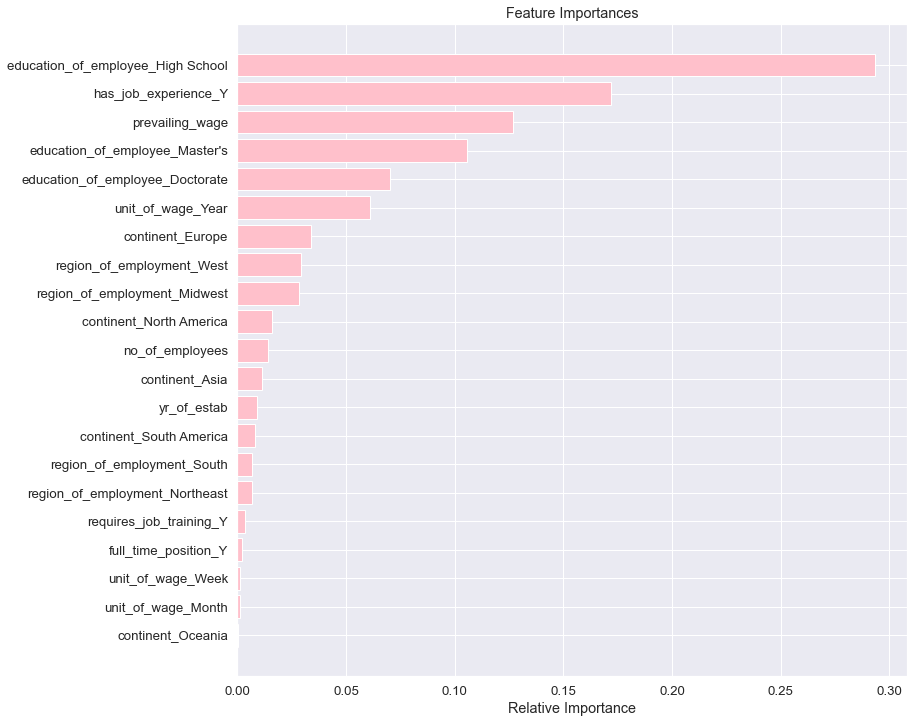

In [216]:
# creating a list of column names
feature_names = x_train.columns.to_list()

# Displaying important features in tree
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

sns.set(font_scale = 1.2)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances for Tuned Gradiant Boosting")
plt.barh(range(len(indices)), importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()